In [36]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utilities import corr_matrix, hist, outliers_IQR, var_to_cat
from Regression_Class import Regressor as Reg

sns.set(style='whitegrid')
sns.set_palette('muted')
#plt.style.use('seaborn-whitegrid')

In [37]:
df = pd.read_csv(
    "C:\\Users\\wince\\Google Drive\\DATA SCIENCE\\LEZIONI\\ML\\Polignano\\01.REGRESSION\\DataEx_LinRegression\\heart.arff.csv",
    delimiter=',')

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [40]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


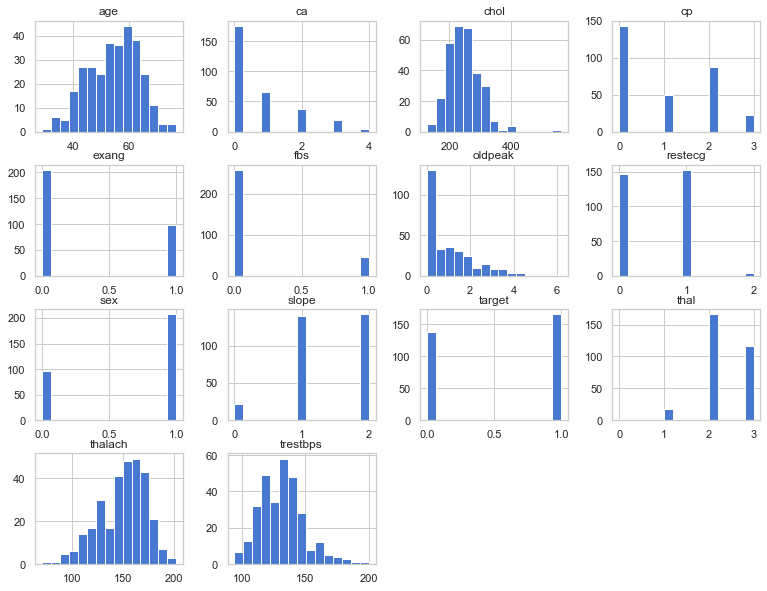

In [41]:
df.hist(figsize=(13,10), bins=15);

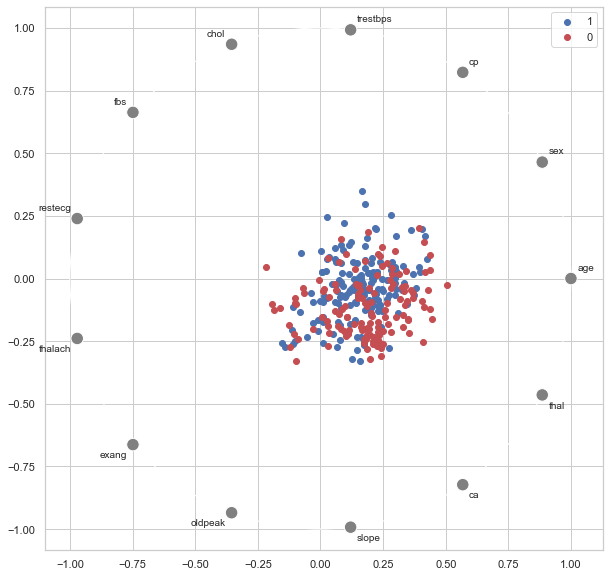

In [42]:
plt.figure(figsize=(10,10))
pd.plotting.radviz(df, 'target', color=('b','r'));

In [43]:
cat_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
df[cat_columns] = df[cat_columns].astype('category')
num_col = df.columns[df.dtypes != 'category']

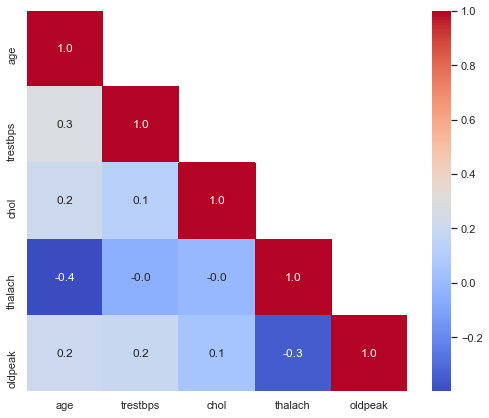

In [44]:
corr_matrix(df)

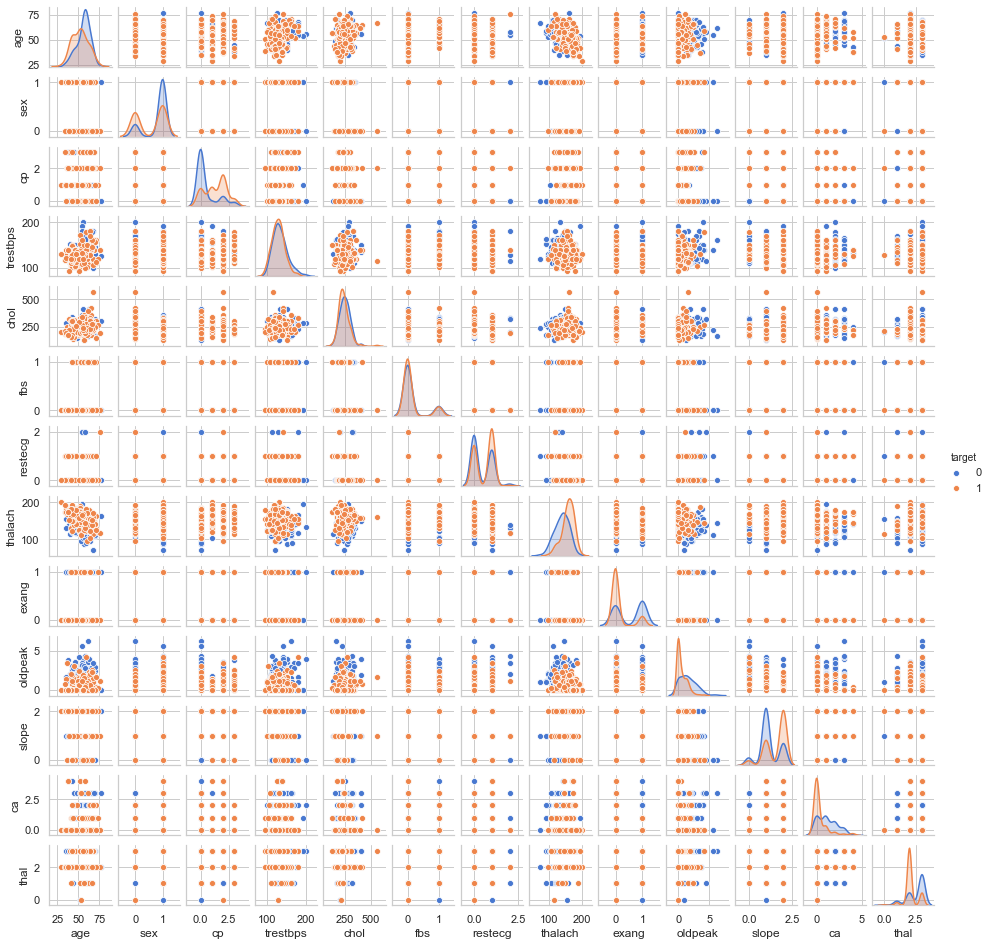

In [45]:
sns.pairplot(df, hue='target', diag_kind='kde', height=1., kind='scatter');

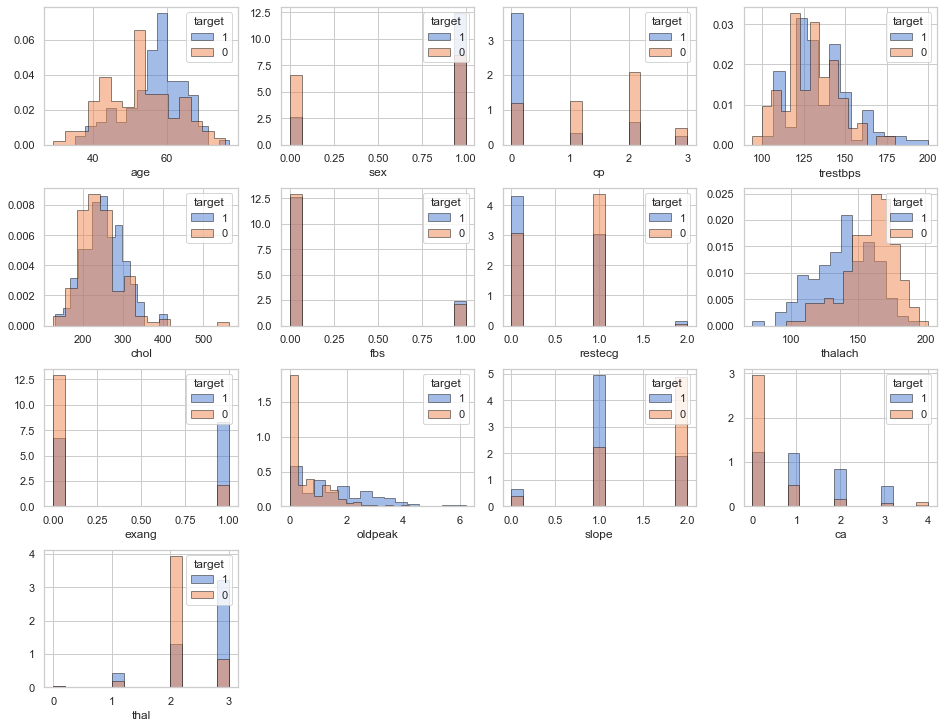

In [46]:
hist(df, ref='target', size=(13,10))

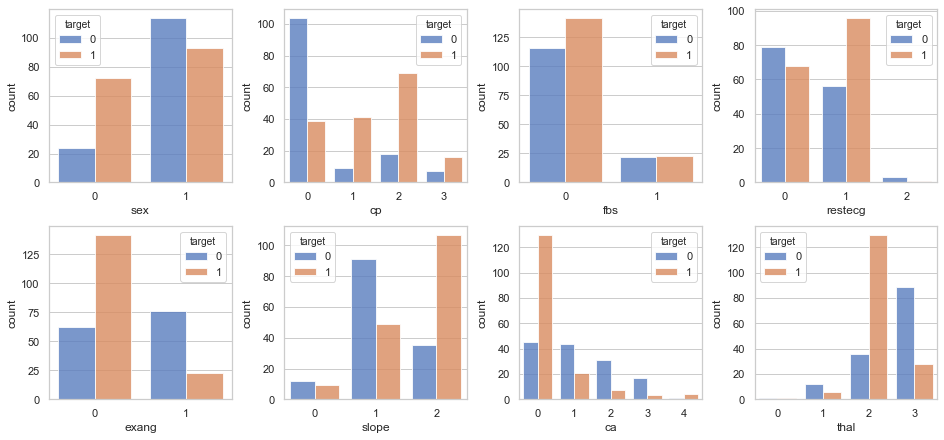

In [47]:
var_to_cat(df, 'category', 'target', alpha=.8)

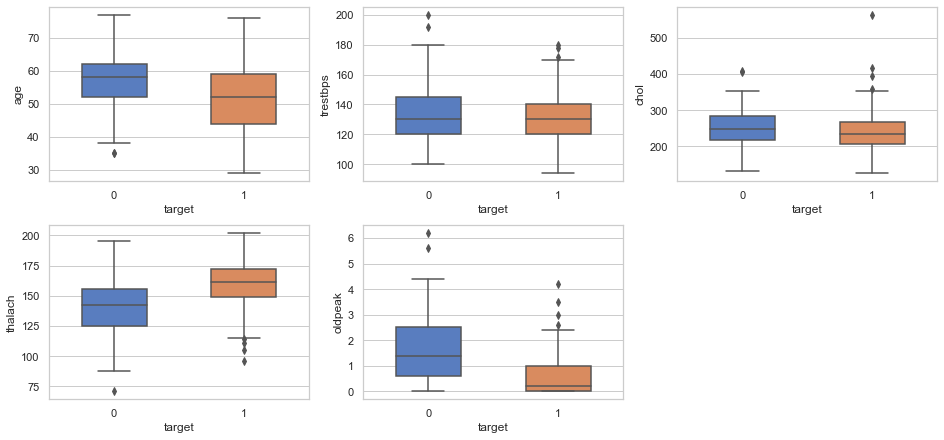

In [48]:
var_to_cat(df, 'number', 'target', col=3)

In [49]:
df.pivot_table(index=['sex', 'ca'], values='target', columns=['cp'], aggfunc='count', margins=1)

cp          0     1     2     3  All
sex ca                              
0   0    24.0  11.0  26.0   3.0   64
    1     2.0   4.0   9.0   NaN   15
    2     9.0   3.0   NaN   1.0   13
    3     4.0   NaN   NaN   NaN    4
1   0    41.0  26.0  31.0  13.0  111
    1    32.0   4.0  11.0   3.0   50
    2    20.0   NaN   2.0   3.0   25
    3    10.0   1.0   5.0   NaN   16
    4     1.0   1.0   3.0   NaN    5
All     143.0  50.0  87.0  23.0  303

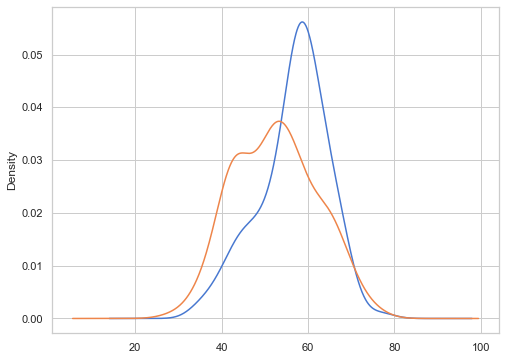

In [50]:
df.groupby('target').age.plot.kde(figsize=(8,6));

In [51]:
df_mix = df.copy()

In [52]:
#df_mix[num_columns] = df_mix[num_columns].transform(outliers_IQR)
df_mix[num_col] = df_mix.groupby('target')[num_col].transform(outliers_IQR)
df_mix[num_col] = df_mix[num_col].transform(lambda x: (x-x.mean())/x.std())

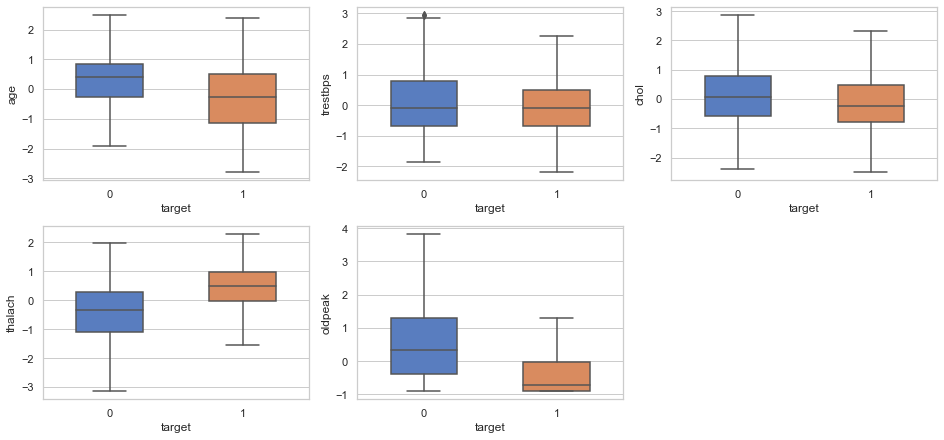

In [53]:
var_to_cat(df_mix, 'number', 'target', col=3)

In [54]:
df_mix = pd.get_dummies(df_mix, drop_first=True).sample(frac=1, random_state=3479).reset_index(drop=True)
df_mix.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target_1
0,1.062416,-0.085838,1.222855,-1.227607,0.865704,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,0.289385,-1.258071,1.898197,-0.299518,1.753681,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2,-0.373212,-0.085838,0.230947,-0.034349,-0.466261,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
3,-2.250573,-0.789178,-0.739857,1.866023,-0.288666,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,0.620684,0.793337,0.779662,-0.343712,1.576086,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [55]:
log_reg = Reg(target='target_1', l_rate=.5, reg_rate=1., beta=.5, stop=3e-3)

In [56]:
X_train, y_train, X_test, y_test = log_reg.split(df_mix, cutoff=.8)

In [57]:
log_reg.fit(X_train, y_train, reset=True).predict(X_test);

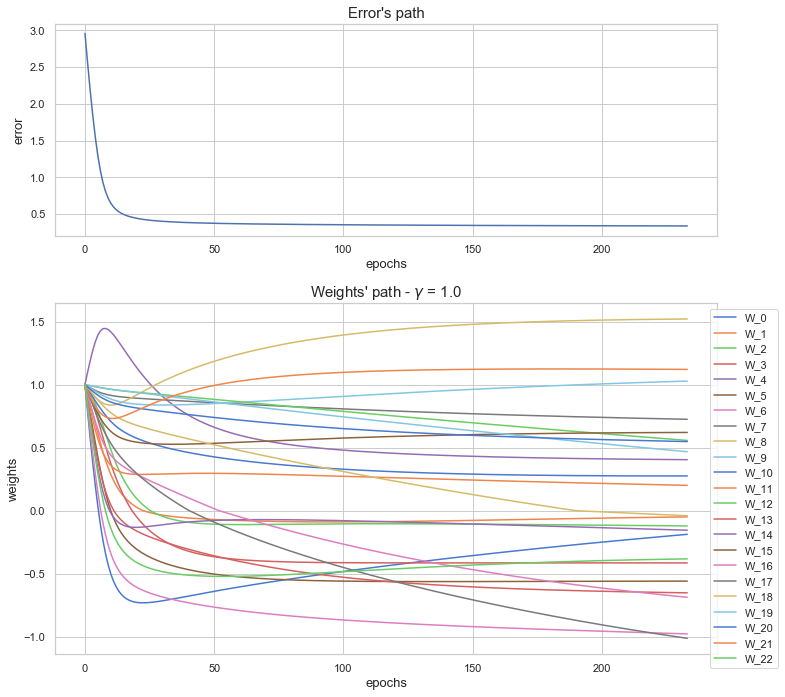

In [58]:
log_reg.graph()

In [59]:
log_reg.weights

,features,weights
0,bias,-0.186905
1,age,-0.048587
2,trestbps,-0.120420
3,chol,-0.413555
4,thalach,0.405050
5,oldpeak,-0.558023
6,sex_1,-0.976601
7,cp_1,0.725292
8,cp_2,1.520733
9,cp_3,1.028556


Accuracy: 0.8688524590163934
Precision: 0.8857142831836734
Recall: 0.8857142831836734
F1 score: 0.8857142331836763



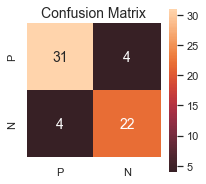

In [60]:
log_reg.metrics(y_test)

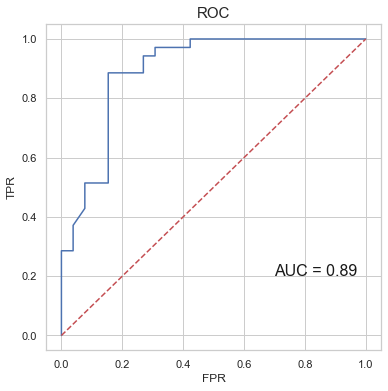

In [61]:
log_reg.ROC(y_test)

Accuracy: 0.8733333333333333
Precision: 0.8604651157787994
Recall: 0.9135802463496419
F1 score: 0.8862275443795046



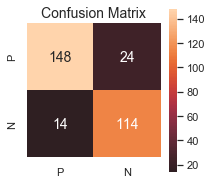

In [62]:
#%%timeit
log_reg.cross_val(df_mix, folds=50)

In [63]:
X_mix, y_mix, _, _ = log_reg.split(df_mix, cutoff=1.)

Accuracy: 0.8547854785478548
Precision: 0.8538011690913444
Recall: 0.8848484843122131
F1 score: 0.8690475685462755



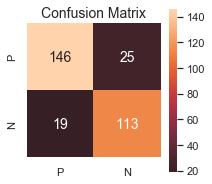

In [64]:
log_reg.predict(X_mix).metrics(y_mix)

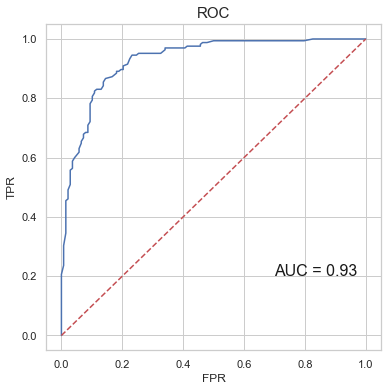

In [65]:
log_reg.ROC(y_mix)